#Lab 6 
David Antonio Garzón Avendaño
Dgarzona@unal.edu.co

##Punto 1
Implementación Metodos para resolver ecuaciones cuadraticas
-  Metodo Tradicional
-  Po Shen Loh

In [36]:
#Tradicional (se asume que el polinomio dado es de la forma ax^2 + b^x + c)
import math 
import numpy 

def SqurtTrad(a:int, b:int, c:int):
  NoReal = False 
  disc = (b**2)- 4*a*c
  if disc < 0:
    disc = disc* -1
    NoReal = True  


  sqrt1 = (-b + math.sqrt(disc))/(2*a)
  sqrt2 = (-b - math.sqrt(disc))/(2*a)
  string = "No real = " + str(NoReal)
  return [sqrt1, sqrt2, string]

SqurtTrad(2, -3, 2)

[1.4114378277661477, 0.08856217223385232, 'No real = True']

In [37]:
#Po Shen Loh 
import math 
import numpy 


def PoShenLoh(a:int, b:int, c:int):
  NoReal = False 
  b = b/a
  c = c/a
  disc = ((b**2)/4) - c
  if disc < 0:
    disc = disc * -1
    NoReal = True 
  
  sqrt1 = -(b/2) + math.sqrt(disc)
  sqrt2 = -(b/2) - math.sqrt(disc)
  string = "No real = " + str(NoReal)
  return [sqrt1, sqrt2, string]

PoShenLoh(2, -3, 2)

[1.4114378277661477, 0.08856217223385232, 'No real = True']

Ahora Ploteamos los siguientes polinomios
  -  $x^2$
  - $(x-1)^2$
  - $x^2 – 1$
  - $x^2+ 1$

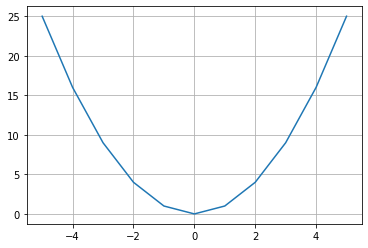

In [38]:
import matplotlib.pyplot as plt

def plot1(rang):
  lista = []
  for x in range(-rang,rang +1):
    y = x**2
    lista.append(y)
  plt.grid()
  plt.plot(list(range(-rang, rang+1)), lista);
  
plot1(5)


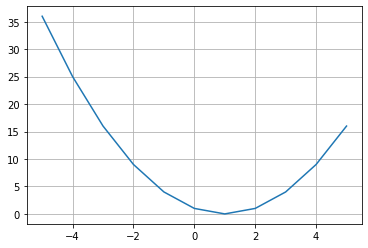

In [39]:
def plot2(rang):
  lista = []
  for x in range(-rang,rang +1):
    y = (x -1)**2
    lista.append(y)
  plt.grid()
  plt.plot(list(range(-rang, rang+1)), lista);
  
plot2(5)

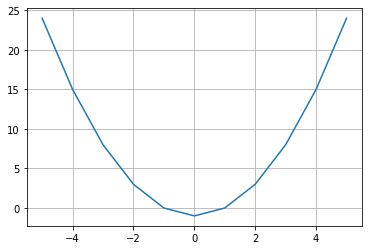

In [40]:
def plot3(rang):
  lista2 = []
  for x in range(-rang,rang +1):
    y = (x**2) - 1
    lista2.append(y)
  plt.grid()
  plt.plot(list(range(-rang, rang+1)), lista2);
  
plot3(5)

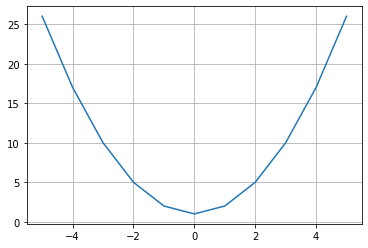

In [41]:
def plot4(rang):
  lista2 = []
  for x in range(-rang,rang +1):
    y = (x**2) + 1
    lista2.append(y)
  plt.grid()
  plt.plot(list(range(-rang, rang+1)), lista2);
  
plot4(5)

##Punto 2
Resolver las siguientes acuaciones con ambos metodos

Formula cuadratica y Po Shen Loh:
  - $ x^2 = 0 $
  - $ (x-1)^2 = 0 $
  - $ x^2 – 1 =0 $
  - $ x^2+ 1 =0 $

In [42]:
# x**2 = 0 

print(SqurtTrad(1,0,0))
print(PoShenLoh(1,0,0))

[0.0, 0.0, 'No real = False']
[0.0, -0.0, 'No real = False']


In [43]:
#(x-1)**2 = 0 , x**2 -2x + 1 = 0 

print(SqurtTrad(1,-2,1))
print(PoShenLoh(1,-2,1))

[1.0, 1.0, 'No real = False']
[1.0, 1.0, 'No real = False']


In [44]:
# x**2 -1  = 0

print(SqurtTrad(1,0,-1))
print(PoShenLoh(1,0,-1))

[1.0, -1.0, 'No real = False']
[1.0, -1.0, 'No real = False']


In [45]:
# x**2 +1  = 0

print(SqurtTrad(1,0,1))
print(PoShenLoh(1,0,1))

[1.0, -1.0, 'No real = True']
[1.0, -1.0, 'No real = True']


##Punto 3 
Graficar los fractales correspondientes a las siguientes ecuaciones cuadraticas complejas: 

- $ z^2$
- $ (z-1)^2 $
- $ z^2 – 1 $
- $ z^2+ 1 $
 

## Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


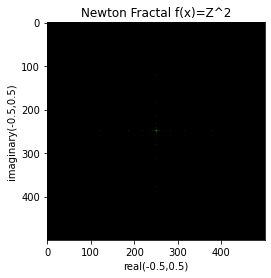

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


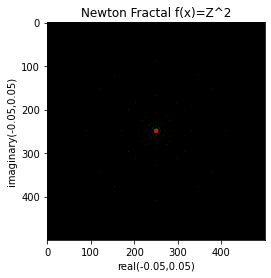

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


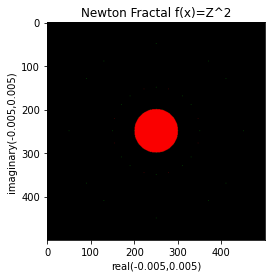

Z region from ( -0.001 , -0.001 ) to ( 0.001 , 0.001 )


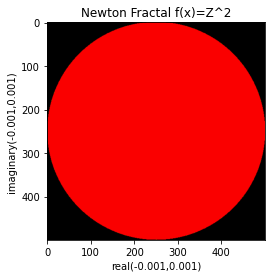

In [2]:
#Edicion 


import math
import matplotlib.pyplot as plt
import numpy as np

def f2(z):
    return z ** 2

def df2(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 0
    r2 = 0

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df2(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f2(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

display1()
display1(zoom = 1/10)
display1(zoom = 1/100)
display1(zoom = 1/500)


Z region from ( 0.5 , -0.5 ) to ( 1.5 , 0.5 )


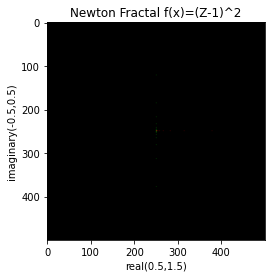

Z region from ( 0.95 , -0.05 ) to ( 1.05 , 0.05 )


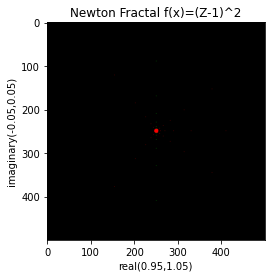

Z region from ( 0.995 , -0.005 ) to ( 1.005 , 0.005 )


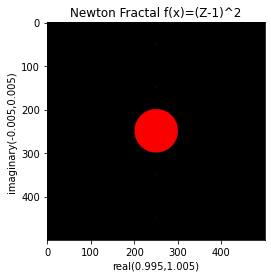

Z region from ( 0.999 , -0.001 ) to ( 1.001 , 0.001 )


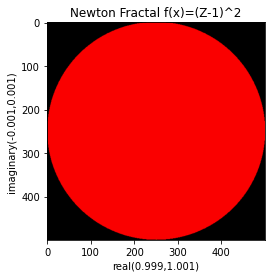

In [3]:
#Edicion 

import math
import matplotlib.pyplot as plt
import numpy as np

def f3(z):
    return (z-1) ** 2

def df3(z):
    return 2*z - 2

def newton_set1(z_c_r=1, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256): #cambio de centro a 1 para que se pueda ver la raiz 
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = 1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df3(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f3(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=1, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256): #cambio de centro a 1 para que se pueda ver la raiz 
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=(Z-1)^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

display1()

display1(zoom = 1/10)
display1(zoom = 1/100)
display1(zoom = 1/500)

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


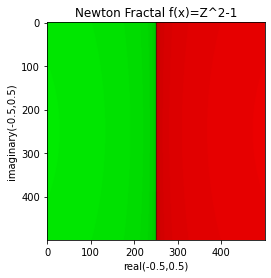

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


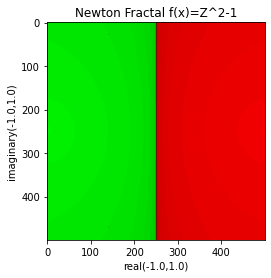

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


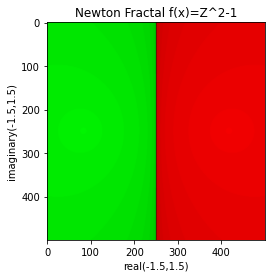

In [4]:
#Edicion 

import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return (z ** 2) - 1

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

display1(zoom=1)
display1(zoom=2)
display1(zoom=3)


Z region from ( 0.5 , -0.5 ) to ( 1.5 , 0.5 )


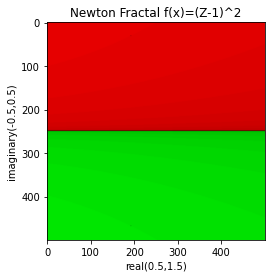

Z region from ( 0.0 , -1.0 ) to ( 2.0 , 1.0 )


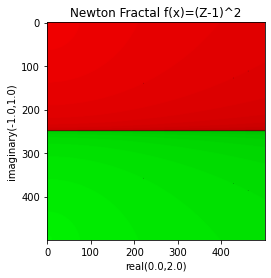

Z region from ( -0.5 , -1.5 ) to ( 2.5 , 1.5 )


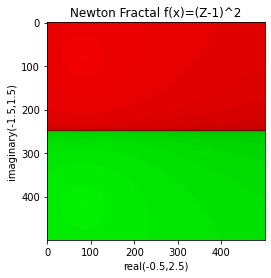

In [5]:
#Edicion 

import math
import matplotlib.pyplot as plt
import numpy as np

def f4(z):
    return z**2 +1

def df4(z):
    return 2*z 

def newton_set1(z_c_r=1, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256): #cambio de centro a 1 para que se pueda ver la raiz 
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = complex(0,1)
    r2 = complex(0,-1)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df4(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f4(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=1, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256): #cambio de centro a 1 para que se pueda ver la raiz 
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=(Z-1)^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


display1(zoom=1)
display1(zoom=2)
display1(zoom=3)


##Punto 4
Graficar las iteraciones de newton en los ejes posivivos y negativo para los polinomios cuadraticos complejos del punto 3 (De una interpretación de los resultados) 




### Newton iterates form z=10.0 + 0.0j

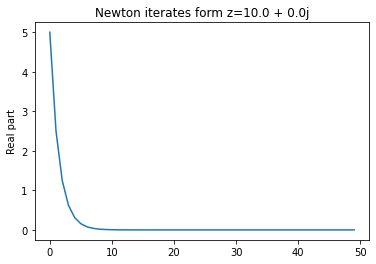

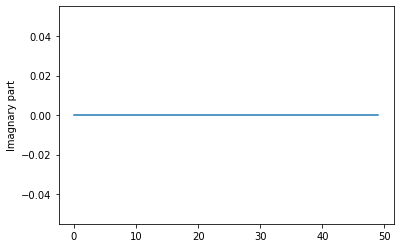

In [62]:
#Edicion 

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df2(z)
  z = z - f2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

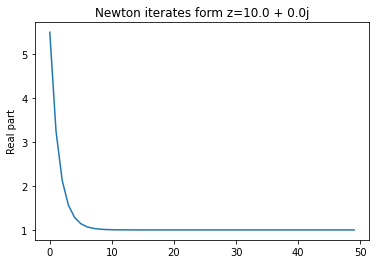

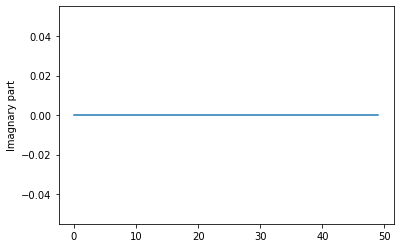

In [63]:
#Edicion 

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df3(z)
  z = z - f3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

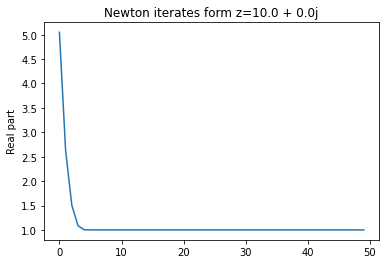

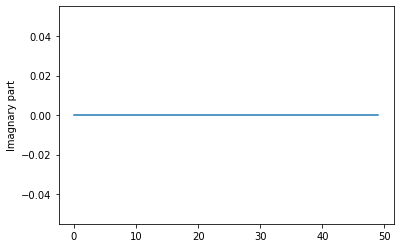

In [64]:
#Edicion 

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

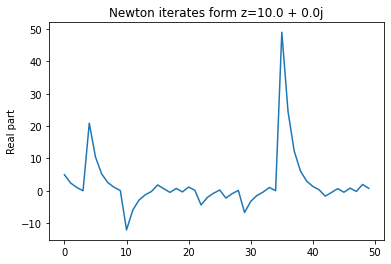

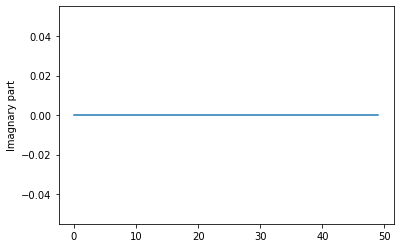

In [65]:
#Edicion 

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df4(z)
  z = z - f4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

### Newton iterates form z=-10.0 + 0.0j

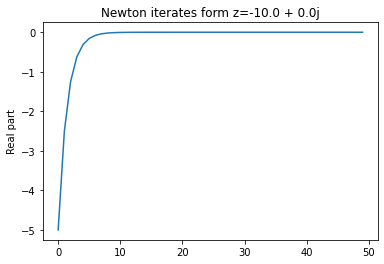

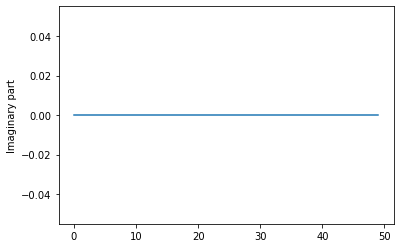

In [66]:
#Edicion 
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df2(z)
  z = z - f2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()


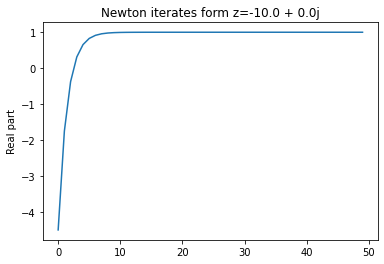

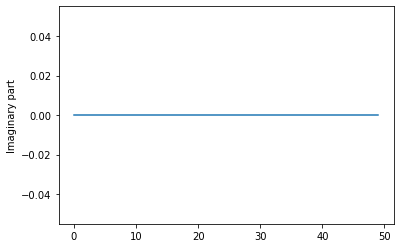

In [67]:
#Edicion

z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df3(z)
  z = z - f3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()


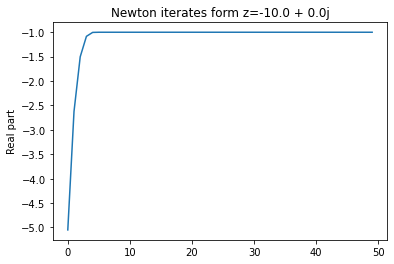

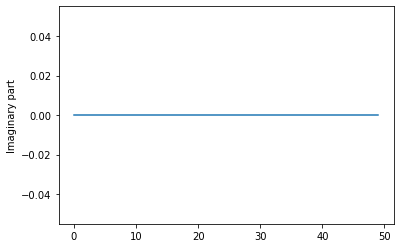

In [68]:
#Edicion

z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

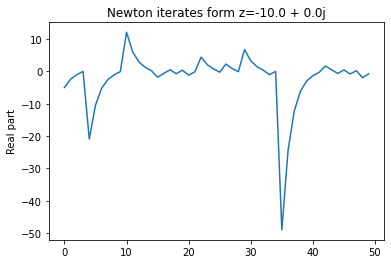

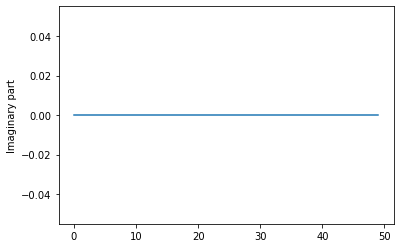

In [69]:
#Edicion
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df4(z)
  z = z - f4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()


### Newton iterates form z=0.0 + 10.0j

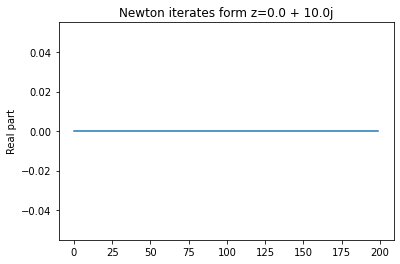

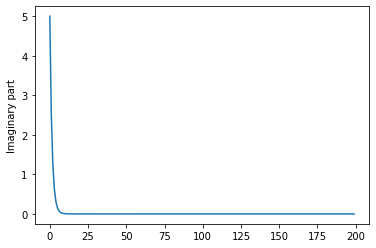

In [70]:
#Edicion
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df2(z)
  z = z - f2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()



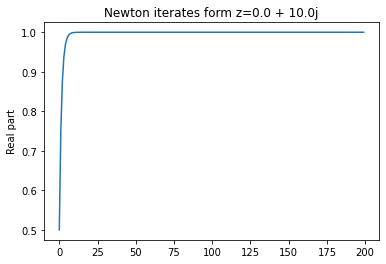

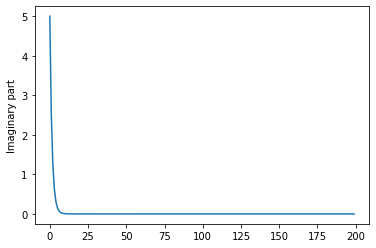

In [71]:
#Edicion
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df3(z)
  z = z - f3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()


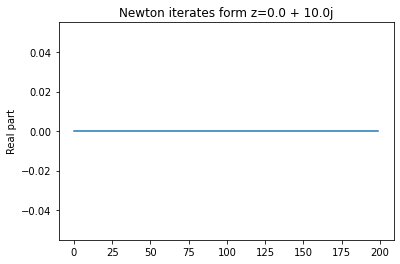

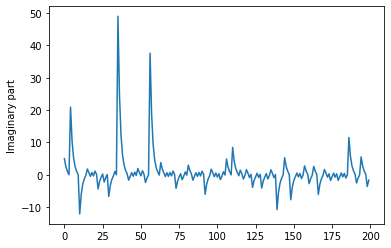

In [72]:
#Edicion
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()


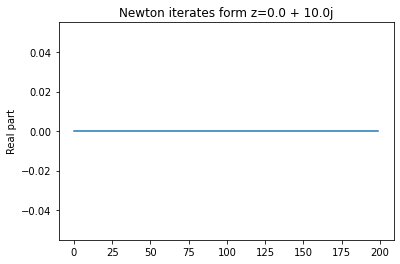

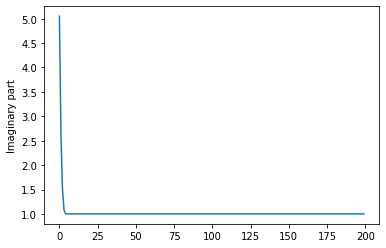

In [73]:
#Edicion
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df4(z)
  z = z - f4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form z=0.0 - 10.0j

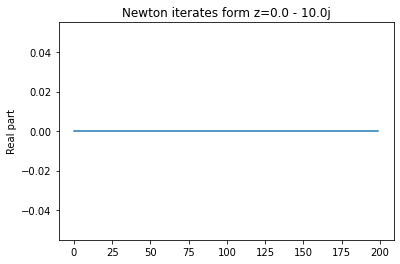

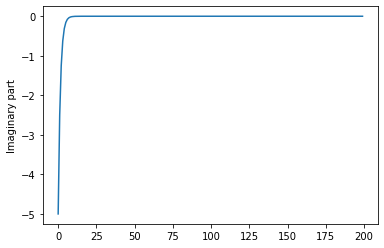

In [74]:
#Edicion
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df2(z)
  z = z - f2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

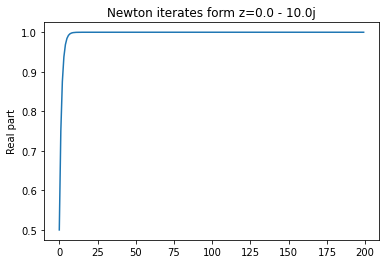

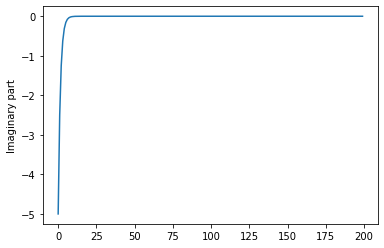

In [75]:
#Edicion
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df3(z)
  z = z - f3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

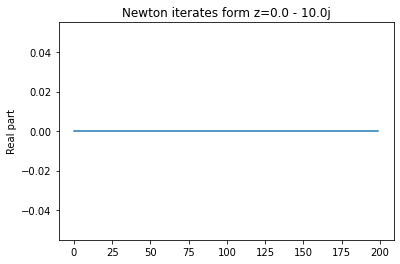

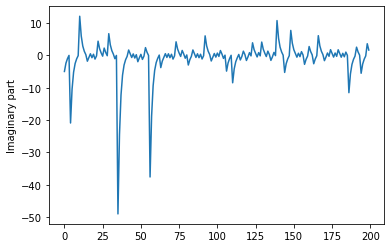

In [76]:
#Edicion
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

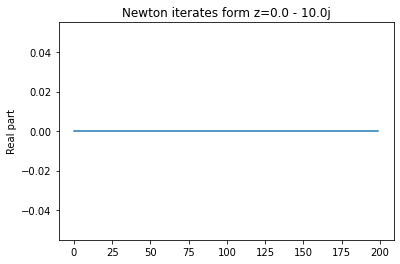

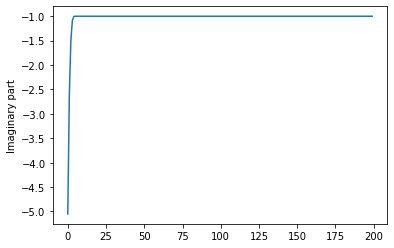

In [77]:
#Edicion
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df4(z)
  z = z - f4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

###Analisis: 

Al hacer estas gráficas, podemos evidnciar como el metodo de Newton Rapson nos permite irnos acercando a las raices de cada uno de los polinomios cuando empezamos en un punto no tan lejano a cada una de ellas. 

Sin embargo al estar calculando raices de polinomios complejos, si tenemos un polinomio con raices complejas, y utilizamos Newton Rapson desde un punto real con parte imaginaria igual a cero (ej: la grafica partiendo desde $10 + 0j$ y usando el polinomio $x^2 + 1$), notamos como este metodo la parte real no se acerca a ningun punto y la parte imaginaria queda en cero; además se tiene un caso similar cuando usamos Newton Rapson desde un punto con parte real igual a cero y parte imaginaria distinta de cero (ej: la grafica partiendo desde $0 + 10j$ de $x^2 - 1$), solo que esta vez la parte imaginaria diverge y la parte real sigue siendo cero. 

##Punto 5

Graficar las iteraciones de Newton para puntos en las diagonales y en 0 + 0j 
Vamos a usar las siguientes: 
-  10.0 + 10.0j
- -10.0 + 10.0j
- -10.0 -10.0j
-  10.0 -10.0j
-  0.0 + 0.0j

### Newton iterates form z= 10.0 + 10.0j

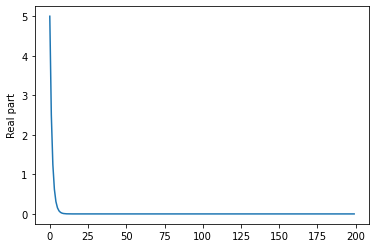

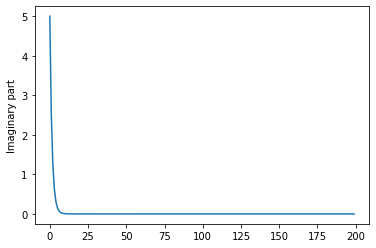

In [78]:
#Edicion 

z= 10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df2(z)
  z = z - f2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

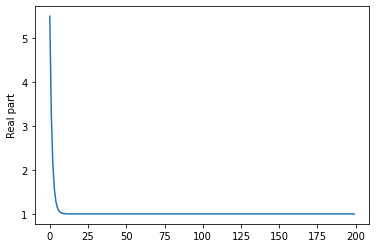

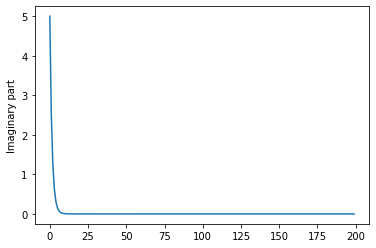

In [79]:
#Edicion 

z= 10.0 + 10.0j
r=[]
i=[]
for k in range(200): #Con más de 50 bucles, se genera un error puesto que dz es aproxiamado a 0. 
  dz = df3(z)
  z = z - f3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

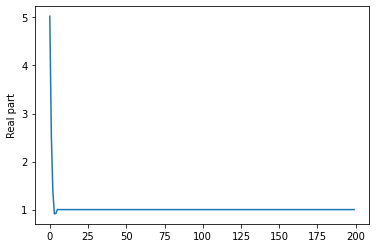

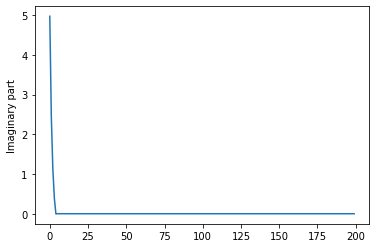

In [80]:
#Edicion 

z= 10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

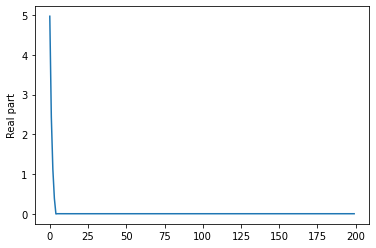

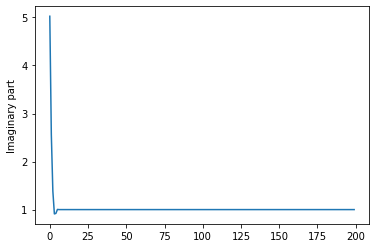

In [81]:
#Edicion 

z= 10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df4(z)
  z = z - f4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form z= -10.0 + 10.0j

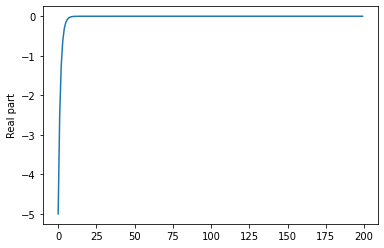

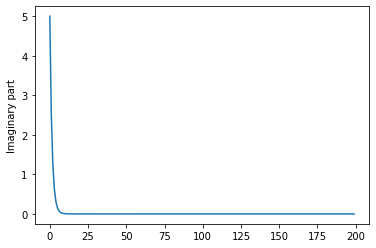

In [82]:
#Edicion 

z= -10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df2(z)
  z = z - f2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

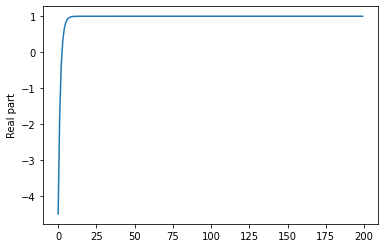

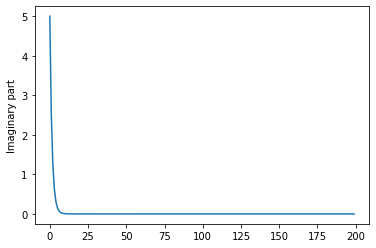

In [83]:
#Edicion 

z= -10.0 + 10.0j
r=[]
i=[]
for k in range(200): #Con más de 50 bucles, se genera un error puesto que dz es aproxiamado a 0. 
  dz = df3(z)
  z = z - f3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

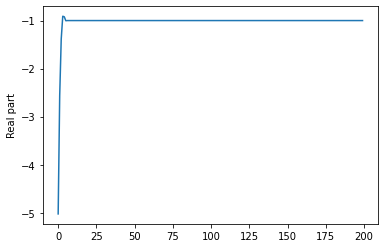

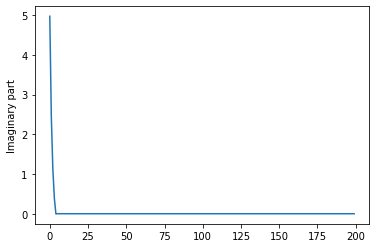

In [84]:
#Edicion 

z= -10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

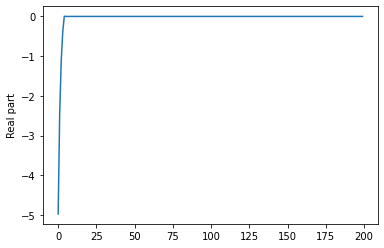

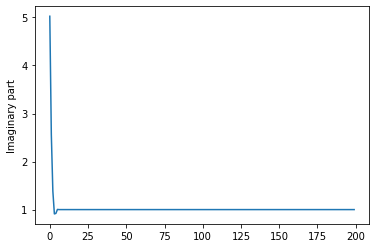

In [85]:
#Edicion 

z= -10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df4(z)
  z = z - f4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form z= -10.0 - 10.0j

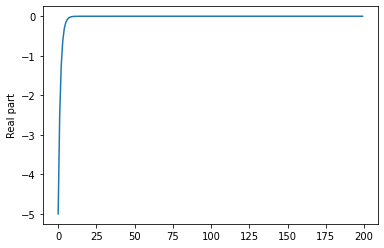

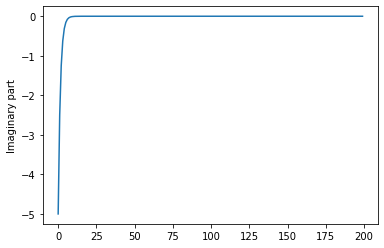

In [86]:
#Edicion 

z= -10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df2(z)
  z = z - f2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

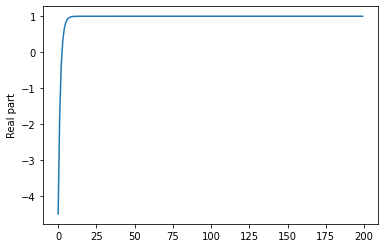

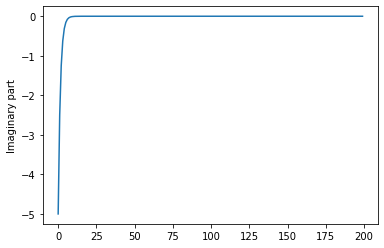

In [87]:
#Edicion 

z= -10.0 - 10.0j
r=[]
i=[]
for k in range(200): #Con más de 50 bucles, se genera un error puesto que dz es aproxiamado a 0. 
  dz = df3(z)
  z = z - f3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

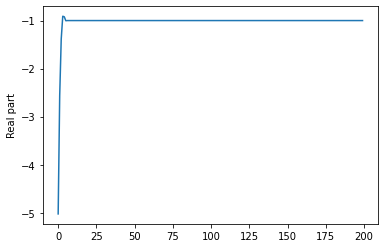

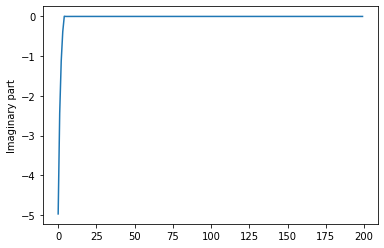

In [88]:
#Edicion 

z= -10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

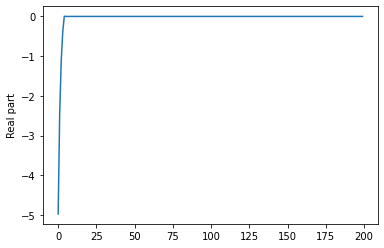

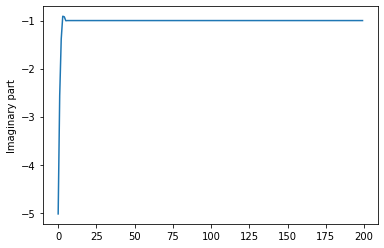

In [89]:
#Edicion 

z= -10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df4(z)
  z = z - f4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form z= 10.0 - 10.0j

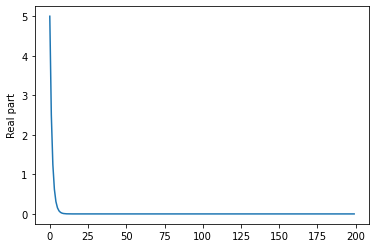

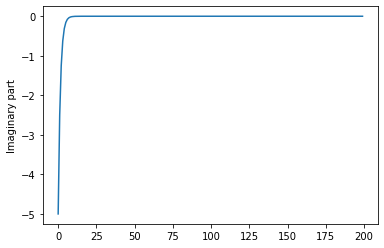

In [90]:
#Edicion 

z= 10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df2(z)
  z = z - f2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

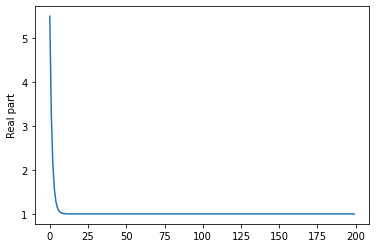

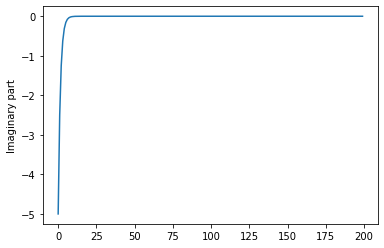

In [91]:
#Edicion 

z= 10.0 - 10.0j
r=[]
i=[]
for k in range(200): #Con más de 50 bucles, se genera un error puesto que dz es aproxiamado a 0. 
  dz = df3(z)
  z = z - f3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

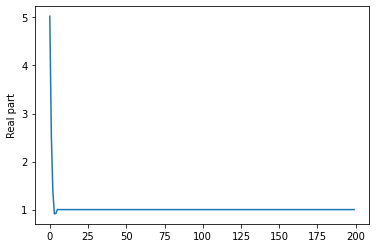

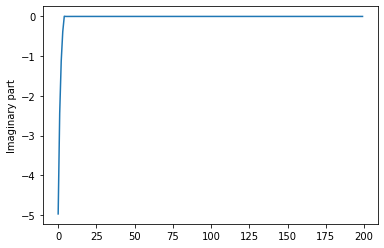

In [92]:
#Edicion 

z= 10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

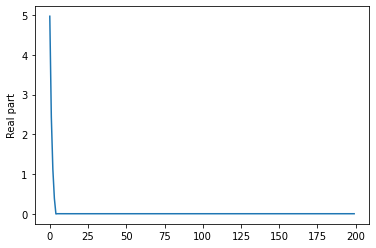

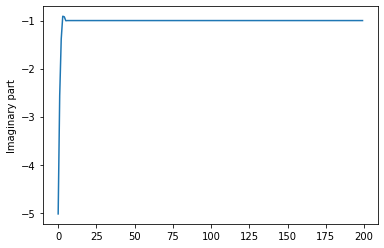

In [93]:
#Edicion 

z= 10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df4(z)
  z = z - f4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form z=0.0 + 0.0j

In [26]:
#Edicion 

z= -0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df2(z)
  z = z - f2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

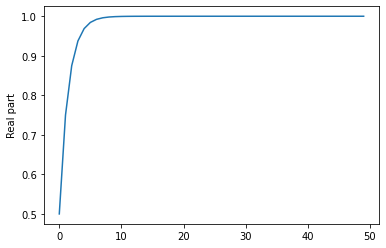

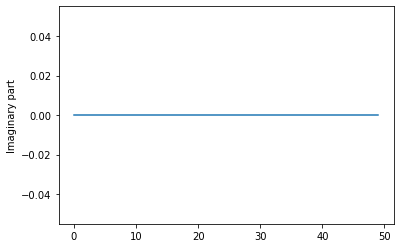

In [38]:
#Edicion 

z=-0.0 + 0.0j
r=[]
i=[]
for k in range(50): #Con más de 50 bucles, se genera un error puesto que dz es aproxiamado a 0. 
  dz = df3(z)
  z = z - f3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

In [41]:
#Edicion 

z= -0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

In [25]:
#Edicion 

z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df4(z)
  z = z - f4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

## Analisis: 

En este caso, podemos ver como el metodo de Newton Rapson funciona sin mayor problema en los puntos en las diagonales. Estáá claro que este metodo nos aproxima a la raiz más cercana al punto de partida, esto se hace evidente cuando usamos el polinomio $x^2 - 1$, el cual tiene raices reales $1$ y $-1$. ya que si se parte de $-10 -10j$ llegaremos a la raiz más cercana (que es -1), y si partimos de $ 10 + 10j$ llegaremos a la raiz más cercana (que es -1).

Para el caso en el que se parte de $0 + 0j$, en 3 de los 4 puntos, diverge la aproximacion. Para el polinomio $(x+1)^2$, que es el unico en el que no tenemos una divición por cero, se pueden calcular las raices, pero por limitaciones en la memoria de los computadores actuales, si se hacen más de 50 iteraciones, se genera una divición por cero, puesto que el dz se aproxima a 0 por un error arithmetic underflow. Sin embargo, la aproximación si se acerca a las raices del polinomio ( la cual tiene como valor 1 y multiplicidad 2) 